## Homework

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or you can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

We need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

In [1135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1136]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Features

For the rest of the homework, you'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`


In [1137]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [1138]:
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']

In [1139]:
df = df[columns]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

In [1140]:
# No hay valores nulos o faltantes
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- `secondary`   ---> **Correct**
- `tertiary`


In [1141]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [1142]:
df['education'].mode()

0    secondary
Name: education, dtype: object

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- `pdays` and `previous`    ---> **Correct**

In [1143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [1144]:
numerical = list(df.select_dtypes('int64').columns)
categorical = list(df.select_dtypes('object').columns)

In [1145]:
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y']

In [1146]:
categorical.pop()

'y'

In [1147]:
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [1148]:
corr_matrix = df[numerical].corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Figure size 1000x800 with 0 Axes>

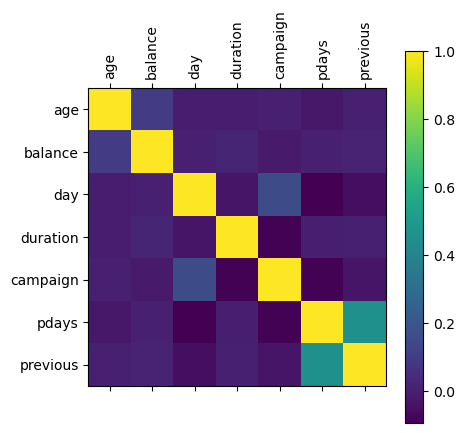

In [1149]:
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix)

plt.xticks(ticks=np.arange(len(numerical)), labels=numerical, rotation=90)
plt.yticks(ticks=np.arange(len(numerical)), labels=numerical)

plt.colorbar()          # Más claro = Mayor correlacion

plt.show()

# la mayor correlación existe entre 'previous' y 'pdays'

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [1150]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [1151]:
# La condición me da una respuesta booleana Tue/False, luego esos True/False se convierten en Int (0:False, 1:True)
df['y'] = (df['y'] == 'yes').astype(int)

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [1152]:
from sklearn.model_selection import train_test_split

In [1153]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [1154]:
df_train, df_val = train_test_split(df_full_train, test_size=(0.2/0.8), random_state=42)

In [1155]:
print("La suma de todos los dataset es:", len(df_train) + len(df_val) + len(df_test))
print("El tamaño del dataset original es:", len(df))

La suma de todos los dataset es: 45211
El tamaño del dataset original es: 45211


In [1156]:
# Reseteamos los indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [1157]:
# Separamos la variable target 'y'
y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values

In [1158]:
# Eliminamos la variable target 'y' de la matriz de características.
del df_train['y']
del df_val['y']
del df_test['y']

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- `poutcome`    ---> **Correct**


In [1159]:
from sklearn.metrics import mutual_info_score

In [1160]:
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [1161]:
print("Mutual Information - job", round(mutual_info_score(y_train, df_train['job']), 2))
print("Mutual Information - marital:", round(mutual_info_score(y_train, df_train['marital']), 2))
print("Mutual Information - education:", round(mutual_info_score(y_train, df_train['education']), 2))
print("Mutual Information - housing:", round(mutual_info_score(y_train, df_train['housing']), 2))
print("Mutual Information - contact:", round(mutual_info_score(y_train, df_train['contact']), 2))
print("Mutual Information - month:", round(mutual_info_score(y_train, df_train['month']), 2))
print("Mutual Information - poutcome:", round(mutual_info_score(y_train, df_train['poutcome']), 2))

Mutual Information - job 0.01
Mutual Information - marital: 0.0
Mutual Information - education: 0.0
Mutual Information - housing: 0.01
Mutual Information - contact: 0.01
Mutual Information - month: 0.03
Mutual Information - poutcome: 0.03


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- 0.9   ---> **Correct**


In [1162]:
from sklearn.feature_extraction import DictVectorizer

In [1163]:
dv = DictVectorizer(sparse=False)

In [1164]:
# Aplicamos Onehot y prepararmos X_train
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [1165]:
# Aplicamos Onehot y preparamos X_val
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [1166]:
from sklearn.linear_model import LogisticRegression

In [1167]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [1168]:
y_pred = model.predict_proba(X_val)[:,1]

In [1169]:
deposit_decision = (y_pred >= 0.5)

In [1170]:
accurary_all_features = (y_val == deposit_decision).mean().round(2)
accurary_all_features

0.9

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `age`
- `balance` ---> **Correct**
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.


#### Eliminando AGE

In [1171]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [1172]:
# Modelo 1: Sin AGE --> X_train_sin_age
# 1. Se actualizará el filtro de categorías Numerical - Categorical eliminando la categoría correspondiente
# 2. Se creará el nuevo diccionario train_dicts y val_dicts
# 3. Se aplicará DictVectorizer para crear los nuevos X_train y X_val
# 4. Entrar el nuevo modelo 
# 5. Calcular accuracy del modelo
# 6. Calcular diferencia entre la accuracy original y accuracy sin la característica.

numerical_s_age = numerical.copy()

In [1173]:
numerical_s_age.remove('age')

In [1174]:
numerical_s_age

['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [1175]:
# Aplicamos Onehot y prepararmos X_train
train_dicts = df_train[categorical + numerical_s_age].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Aplicamos Onehot y preparamos X_val
val_dicts = df_val[categorical + numerical_s_age].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [1176]:
model_s_age = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_s_age.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [1177]:
y_pred = model_s_age.predict_proba(X_val)[:,1]
deposit_decision = (y_pred >= 0.5)
accuracy_s_age = (y_val == deposit_decision).mean()
print("La accuracy sin AGE es:", accuracy_s_age)

La accuracy sin AGE es: 0.9010174740101747


#### Eliminando BALANCE

In [1178]:
# Modelo 1: Sin AGE --> X_train_sin_age
# 1. Se actualizará el filtro de categorías Numerical - Categorical eliminando la categoría correspondiente
# 2. Se creará el nuevo diccionario train_dicts y val_dicts
# 3. Se aplicará DictVectorizer para crear los nuevos X_train y X_val
# 4. Entrar el nuevo modelo 
# 5. Calcular accuracy del modelo
# 6. Calcular diferencia entre la accuracy original y accuracy sin la característica.

numerical_s_balance = numerical.copy()

In [1179]:
numerical_s_balance.remove('balance')

In [1180]:
numerical_s_balance

['age', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [1181]:
# Aplicamos Onehot y prepararmos X_train
train_dicts = df_train[categorical + numerical_s_balance].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Aplicamos Onehot y preparamos X_val
val_dicts = df_val[categorical + numerical_s_balance].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [1182]:
model_s_balance = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_s_balance.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [1183]:
y_pred = model_s_balance.predict_proba(X_val)[:,1]
deposit_decision = (y_pred >= 0.5)
accuracy_s_balance = (y_val == deposit_decision).mean()
print("La accuracy sin BALANCE es:", accuracy_s_balance)

La accuracy sin BALANCE es: 0.9006856890068569


#### Eliminando MARITAL

In [1184]:
# Modelo 1: Sin AGE --> X_train_sin_age
# 1. Se actualizará el filtro de categorías Numerical - Categorical eliminando la categoría correspondiente
# 2. Se creará el nuevo diccionario train_dicts y val_dicts
# 3. Se aplicará DictVectorizer para crear los nuevos X_train y X_val
# 4. Entrar el nuevo modelo 
# 5. Calcular accuracy del modelo
# 6. Calcular diferencia entre la accuracy original y accuracy sin la característica.

categorical_s_marital = categorical.copy()

In [1185]:
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [1186]:
categorical_s_marital.remove('marital')

In [1187]:
categorical_s_marital

['job', 'education', 'housing', 'contact', 'month', 'poutcome']

In [1188]:
# Aplicamos Onehot y prepararmos X_train
train_dicts = df_train[categorical_s_marital + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Aplicamos Onehot y preparamos X_val
val_dicts = df_val[categorical_s_marital + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [1189]:
model_s_marital = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_s_marital.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [1190]:
y_pred = model_s_marital.predict_proba(X_val)[:,1]
deposit_decision = (y_pred >= 0.5)
accuracy_s_marital = (y_val == deposit_decision).mean()
print("La accuracy sin MARITAL es:", accuracy_s_marital)

La accuracy sin MARITAL es: 0.9010174740101747


#### Eliminando PREVIOUS

In [1191]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [1192]:
# Modelo 1: Sin AGE --> X_train_sin_age
# 1. Se actualizará el filtro de categorías Numerical - Categorical eliminando la categoría correspondiente
# 2. Se creará el nuevo diccionario train_dicts y val_dicts
# 3. Se aplicará DictVectorizer para crear los nuevos X_train y X_val
# 4. Entrar el nuevo modelo 
# 5. Calcular accuracy del modelo
# 6. Calcular diferencia entre la accuracy original y accuracy sin la característica.

numerical_s_previous = numerical.copy()

In [1193]:
numerical_s_previous.remove('previous')

In [1194]:
numerical_s_previous

['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

In [1195]:
# Aplicamos Onehot y prepararmos X_train
train_dicts = df_train[categorical + numerical_s_previous].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Aplicamos Onehot y preparamos X_val
val_dicts = df_val[categorical + numerical_s_previous].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [1196]:
model_s_previous = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_s_previous.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [1197]:
y_pred = model_s_previous.predict_proba(X_val)[:,1]
deposit_decision = (y_pred >= 0.5)
accuracy_s_previous = (y_val == deposit_decision).mean()
print("La accuracy sin PREVIOUS es:", accuracy_s_previous)

La accuracy sin PREVIOUS es: 0.9010174740101747


In [1198]:
# Diferencia entre accuracys
print("Diff todas y sin age:",abs(accurary_all_features - accuracy_s_age))
print("Diff todas y sin balance:",abs(accurary_all_features - accuracy_s_balance))
print("Diff todas y sin marital:",abs(accurary_all_features - accuracy_s_marital))
print("Diff todas y sin previous:",abs(accurary_all_features - accuracy_s_previous))

Diff todas y sin age: 0.0010174740101747126
Diff todas y sin balance: 0.0006856890068568378
Diff todas y sin marital: 0.0010174740101747126
Diff todas y sin previous: 0.0010174740101747126


### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1       ---> **Correct**
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [1199]:
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [1200]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [1201]:
# Aplicamos Onehot y prepararmos X_train
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
# Aplicamos Onehot y preparamos X_val
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [1213]:
# El mismo X_train, y_train y X_val pero C=0.01
model_c_0_01 = LogisticRegression(solver='liblinear', C=0.01, max_iter=1000, random_state=42)
model_c_0_01.fit(X_train, y_train)
y_pred = model_c_0_01.predict_proba(X_val)[:,1]
deposit_decision = (y_pred >= 0.5)
accuracy_c_0_01 = (y_val == deposit_decision).mean()
print("Accuracy C=0.01:", accuracy_s_previous.round(4))


Accuracy C=0.01: 0.901


In [1211]:
# El mismo X_train, y_train y X_val pero C=0.1
model_c_01 = LogisticRegression(solver='liblinear', C=0.1, max_iter=1000, random_state=42)
model_c_01.fit(X_train, y_train)
y_pred = model_c_01.predict_proba(X_val)[:,1]
deposit_decision = (y_pred >= 0.5)
accuracy_c_01 = (y_val == deposit_decision).mean()
print("Accuracy C=0.1:", accuracy_c_01.round(4))


Accuracy C=0.1: 0.9013


In [1210]:
# El mismo X_train, y_train y X_val pero C=1
model_c_1 = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=42)
model_c_1.fit(X_train, y_train)
y_pred = model_c_1.predict_proba(X_val)[:,1]
deposit_decision = (y_pred >= 0.5)
accuracy_c_1 = (y_val == deposit_decision).mean()
print("Accuracy C=1:", accuracy_c_1.round(4))


Accuracy C=1: 0.9007


In [1209]:
# El mismo X_train, y_train y X_val pero C=10
model_c_10 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model_c_10.fit(X_train, y_train)
y_pred = model_c_10.predict_proba(X_val)[:,1]
deposit_decision = (y_pred >= 0.5)
accuracy_c_10 = (y_val == deposit_decision).mean()
print("Accuracy C=10:", accuracy_c_10.round(4))


Accuracy C=10: 0.9007


In [1208]:
# El mismo X_train, y_train y X_val pero C=100
model_c_100 = LogisticRegression(solver='liblinear', C=100, max_iter=1000, random_state=42)
model_c_100.fit(X_train, y_train)
y_pred = model_c_100.predict_proba(X_val)[:,1]
deposit_decision = (y_pred >= 0.5)
accuracy_c_100 = (y_val == deposit_decision).mean()
print("Accuracy C=100:", accuracy_c_100.round(4))


Accuracy C=100: 0.9009



## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw03
* If your answer doesn't match options exactly, select the closest one